# Linear Regression Practices 

## Set 1 

Reference : https://www.geeksforgeeks.org/linear-regression-python-implementation/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def main():
    # Observations
    X = np.array([0,1,2,3,4,5,6,7,8,9])
    y = np.array([1,3,2,5,7,8,8,9,10,12])
    
    ## Estimating Coefficients 
    b = estimate_coefficients(X, y)
    print("Estimated Coefficients : \n b_0 = {} \n b_1 = {}".format(b[0], b[1]))
    
    ## Plotting regression Line
    plot_regression_line(X, y, b)
    
    
    
    

In [14]:
def estimate_coefficients(X, y):
    
    ## Number of observations or points
    n = np.size(X)
    
    ## Mean of X and Y vector
    m_X, m_y = np.mean(X), np.mean(y)
    
    ## Calculating cross_deviation and deviation about X
    SS_xy = np.sum(y*X) - n*m_y*m_X
    SS_xx = np.sum(X*X) - n*m_X*m_X
    
    ## Calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_X
    
    return (b_0, b_1)

In [15]:
def plot_regression_line(X, y, b):
    
    ## Plotting the actual points as scatter plot
    plt.scatter(X, y, color = "m", marker = "o", s = 30)
    
    ## predicted response vector
    y_pred = b[0] + b[1]*X
    
    ## Plotting the regression line
    plt.plot(X, y_pred, color = "g")
    
    ## putting labels
    plt.xlabel("x")
    plt.ylabel("Y")
    
    plt.show()
    

Estimated Coefficients : 
 b_0 = 1.2363636363636363 
 b_1 = 1.1696969696969697


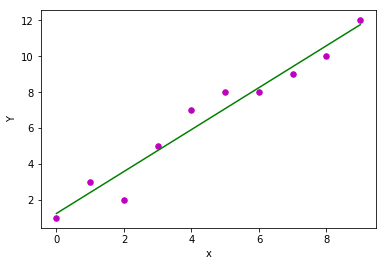

In [16]:
if __name__ == "__main__":
    main()

## SET2 
### Multiple Linear Regression Technique 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

## loading dataset
boston = datasets.load_boston(return_X_y = False)

## Defining Feature Matrix (X) and response vector (Y)
X = boston.data
y = boston.target



In [4]:
## splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)




In [6]:
## Creating a Linear Regression

reg = linear_model.LinearRegression()

### Train the model using training sets
reg.fit(X_train, y_train)

## regression coefficients
print("Coefficients: \n", reg.coef_)

Coefficients: 
 [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]


In [7]:
## Variance score : 1 means perfect prediction
print("Variance score : {} ".format(reg.score(X_test, y_test)))



Variance score : 0.7209056672661763 


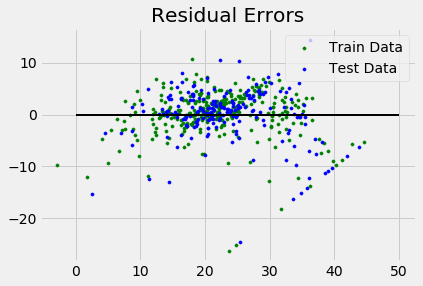

In [8]:
## plotting residual error

## setting plot style
plt.style.use("fivethirtyeight")

## Plotting residual errors in training data\
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = "Train Data")

### Plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = "Test Data")

## Plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## Plotting legend
plt.legend(loc = "upper right")
plt.title("Residual Errors")
plt.show()



In [12]:
class LinearRegression:
    
    def __init__(self, X, y, alpha = 0.01, b0 = 0, b1 = 0 ):
        """
        x input features 
        y target features
        alpha : learning rate, default is 0.01
        b0, b1 : linear regression coefficients
        """
        
        self.i = 0
        self.X = X
        self.y = y
        self.alpha = alpha
        self.b0 = b0
        self.b1 = b1
        
        if len(X) != len(y):
            raise TypeError("x and y should have same number of rows")
            
    def predict(model, X):
        """ Predicts the value of prediction based on the 
            current value of regression coefficients when input is x """
        
        "y = b0 + b1 * X"
        return model.b0 + model.b1*X
    
    def cost_derivative(model, i):
        X, y, b0, b1 = model.X, model.y, model.b0, model.b1
        predict = model.predict
        return sum([
            
            2 * (predict(Xi) - yi) * 1
            if i == 0
            else (predict(Xi) - yi) * Xi
            for Xi , yi in zip(X, y)
        ])/ len(X)
    
    
    
    def update_coeff(model, i):
        cost_derivative = model.cost_derivative
        if i == 0:
            model.b0 -= model.alpha * cost_derivative(i)
        elif i == 1:
            model.b1 -= model.alpha * cost_derivative(i)
    
    def stop_iteration(model, max_epochs = 1000):
        model.i += 1
        if model.i == max_epochs:
            return True
        else:
            return False
            
    
    def fit(model):
        update_coeff = model.update_coeff
        model.i = 0
        while True:
            if model.stop_iteration():
                break
            else:
                update_coeff(0)
                update_coeff(1)
    

    
    
    
if __name__ == "__main__":
    linearRegressor = LinearRegression(
    X = [i for i in range(12)],
    y = [2 * i+3 for i in range(12) ], 
    alpha = 0.03
    )
    
    linearRegressor.fit()
    print(linearRegressor.predict(12))
    ### answer expects is 2 * 12 + 3 = 27
        

27.00000004287766


## SET 3 : 

## Polynomial Linear Regression Implementation

Reference : https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

In [15]:
## Importing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing the dataset
datas = pd.read_csv("data.csv")
datas


,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [16]:
datas.shape

(6, 3)

In [17]:
## Diving the dataset 
# X contains column between 1 to 2, i.e. Temperature
# y contains 2 i.e. pressure

X = datas.iloc[:, 1 : 2].values
y = datas.iloc[:, 2].values




In [18]:
## Fitting linear regression to dataset

from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
## Fitting polynomial regression to dataset

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

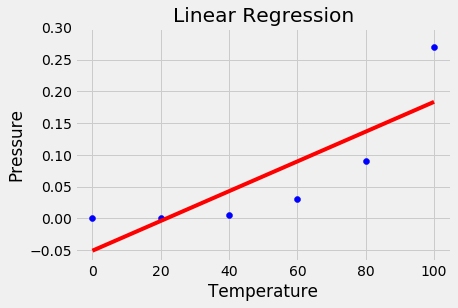

In [20]:
### Linear Regression resulkts

plt.scatter(X, y, color = "blue")

plt.plot(X, lin.predict(X), color = "red")
plt.title("Linear Regression")
plt.xlabel("Temperature")
plt.ylabel("Pressure")

plt.show()

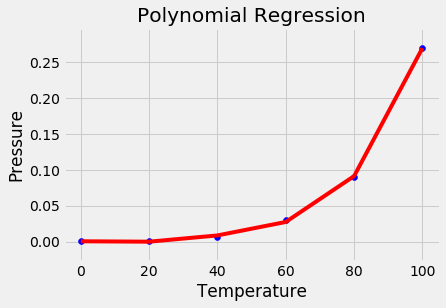

In [21]:
## Polynmial results 

plt.scatter(X, y, color = "blue")

plt.plot(X, lin2.predict(poly.fit_transform(X)), color = "red")

plt.title("Polynomial Regression")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()

In [35]:
## Predicting results with both linear and Polynomial regression
## lin.predict(np.array([[110.0]]))
lin.predict(np.array([[110.0]]))

array([0.20675333])

In [37]:
## lin2.predict(poly.fit_transform([110.0,]))

lin2.predict(poly.fit_transform(np.array([[110.0]])))

array([0.43295877])

## SET 4 : Simple Linear Regression using sklearn

In [38]:
## Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
## Reading the data

df = pd.read_csv("bottle.csv", nrows = 100000)
df_binary = df[["Salnty", "T_degC"]]

In [64]:
df.shape

(100000, 74)

In [65]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [66]:
df_binary.shape

(100000, 2)

In [67]:
df_binary.columns = ["sal", "temp"]

In [68]:
df_binary.head()

,sal,temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


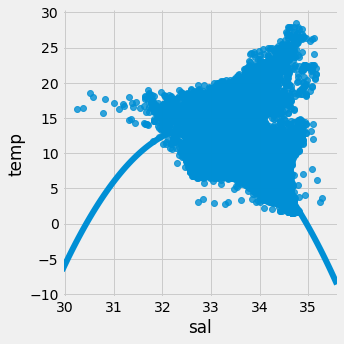

In [69]:
### exploration of data

sns.lmplot(x = "sal", y = "temp", data = df_binary, order = 2, ci = None)


In [70]:
## Data Cleaning

### Eliminating NaN and missing values

df_binary.fillna(method  = "ffill", inplace = True)

C:\Users\swetha\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [71]:
### Training our model

X = np.array(df_binary["sal"]).reshape(-1,1)
y = np.array(df_binary["temp"]).reshape(-1,1)

""" 
Sepearting the data into independent and depenedent variables
converting each dataframe into numpy array
since each dataframe contains only one column

""" 
## Dropping any rows with NaN values
df_binary.dropna(inplace = True)

## splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)




C:\Users\swetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [72]:
## Fitting the model

regr = LinearRegression()
regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

0.18278975353619298


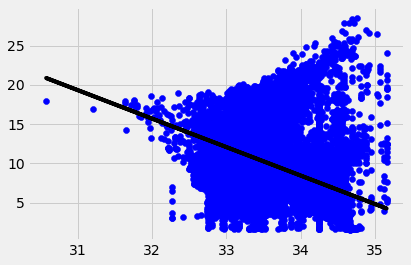

In [74]:
### Exploring the results

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color = "b" )
plt.plot(X_test, y_pred, color = "k")

plt.show()

In [75]:
df_binary_500 = df_binary[:][:500]

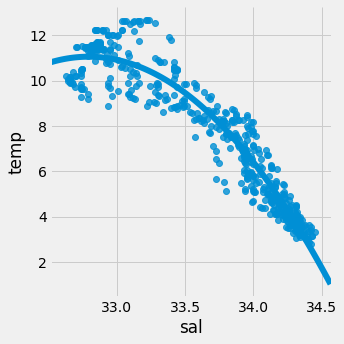

In [76]:
sns.lmplot(x = "sal", y = "temp", data = df_binary_500, order = 2, ci = None)

In [80]:
df_binary_500.fillna(method = "ffill", inplace = True)

X = np.array(df_binary_500["sal"]).reshape(-1,1)
y = np.array(df_binary_500["temp"]).reshape(-1,1)

df_binary_500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 )



In [81]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

0.8685415203466087


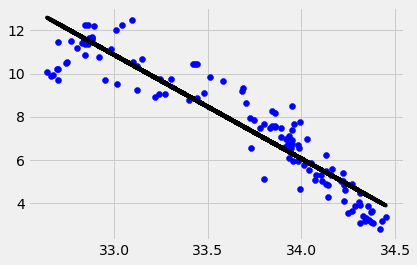

In [82]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color = "b")

plt.plot(X_test, y_pred, color = "k")
plt.show()